In [1]:
import numpy as np # linear algebra
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
models = []

models.append(("LR", LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForests', RandomForestClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('Light GBM', LGBMClassifier()))

In [5]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=46)

for name,model in models:
    mod = model.fit(X_train,y_train) #trainleri modele fit etmek
    y_pred = mod.predict(X_test) # tahmin
    acc = accuracy_score(y_test, y_pred) #rmse hesabı
    cvscore = cross_val_score(model, X,y, cv = 10).mean()
    print("Holdout Method:",end=" ")
    print(name,acc) #yazdırılacak kısım
    print("Cross Val Score",end=" ")
    print(name,cvscore)
    print("------------------------------------")

Holdout Method: LR 0.7597402597402597
Cross Val Score LR 0.7734791524265209
------------------------------------
Holdout Method: KNN 0.7077922077922078
Cross Val Score KNN 0.7213773069036227
------------------------------------
Holdout Method: SVR 0.7727272727272727
Cross Val Score SVR 0.7578605604921396
------------------------------------
Holdout Method: CART 0.6883116883116883
Cross Val Score CART 0.7057245386192755
------------------------------------
Holdout Method: RandomForests 0.7272727272727273
Cross Val Score RandomForests 0.7656698564593303
------------------------------------
Holdout Method: GradientBoosting 0.7532467532467533
Cross Val Score GradientBoosting 0.7578092959671908
------------------------------------
Holdout Method: XGBoost 0.6883116883116883
Cross Val Score XGBoost 0.7357142857142857
------------------------------------
Holdout Method: Light GBM 0.6883116883116883
Cross Val Score Light GBM 0.7343984962406016
------------------------------------


In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
naValues = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for i in naValues:
    df[i][(df[i].isnull()) & (df["Outcome"] == 0)] = df[i][(df[i].isnull()) & (df["Outcome"] == 0)].fillna(df[i][df["Outcome"] == 0].mean())
    df[i][(df[i].isnull()) & (df["Outcome"] == 1)] = df[i][(df[i].isnull()) & (df["Outcome"] == 1)].fillna(df[i][df["Outcome"] == 1].mean())

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

df[(df["Glucose"].isnull()) & (df["Outcome"] == 0)]

df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 0)] = df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 0)].fillna(110.643863)

df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 1)] = df["Glucose"][(df["Glucose"].isnull()) & (df["Outcome"] == 1)].fillna(142.319549)

#----------------------------------------------------------------

df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 0)] = df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 0)].fillna(70.877339)

df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 1)] = df["BloodPressure"][(df["BloodPressure"].isnull()) & (df["Outcome"] == 1)].fillna(75.321429)

#-----------------------------------------------------------------

df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 0)] = df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 0)].fillna(27.235457)

df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 1)] = df["SkinThickness"][(df["SkinThickness"].isnull()) & (df["Outcome"] == 1)].fillna(33.000000)

#-----------------------------------------------------------------

df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 0)] = df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 0)].fillna(130.287879)

df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 1)] = df["Insulin"][(df["Insulin"].isnull()) & (df["Outcome"] == 1)].fillna(206.846154)

#-----------------------------------------------------------------

df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 0)] = df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 0)].fillna(30.859674)

df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 1)] = df["BMI"][(df["BMI"].isnull()) & (df["Outcome"] == 1)].fillna(35.406767)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
df.shape

(768, 9)

In [16]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

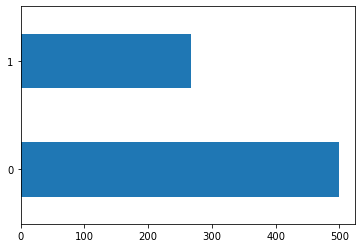

In [18]:
df.Outcome.value_counts().plot.barh()

In [19]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.000,1.00000,3.000000,6.000000,7.000000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.697358,30.462008,44.000,67.67000,80.00000,86.700,99.75000,117.000000,141.000000,147.000000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.428141,12.106044,24.000,44.00000,52.00000,58.000,64.00000,72.000000,80.000000,82.000000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.247042,8.923908,7.000,10.00000,14.35000,18.000,25.00000,28.000000,33.000000,35.000000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,157.003527,88.860914,14.000,24.34000,50.00000,67.000,121.50000,130.287879,206.846154,206.846154,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.446420,6.878970,18.200,19.50000,22.23500,24.000,27.50000,32.050000,36.600000,37.800000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.165,0.24375,0.372500,0.626250,0.687000,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,22.000,24.00000,29.000000,41.000000,42.600000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000,0.00000,0.000000,1.000000,1.000000,1.0000,1.00000,1.00000,1.00


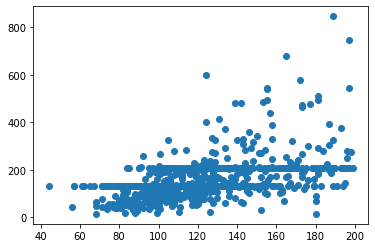

In [20]:
plt.scatter(df.Glucose,df.Insulin)

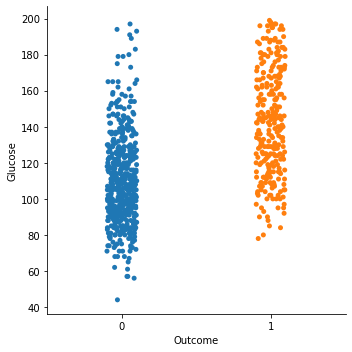

In [21]:
sns.catplot(x = "Outcome", y = "Glucose", data = df);

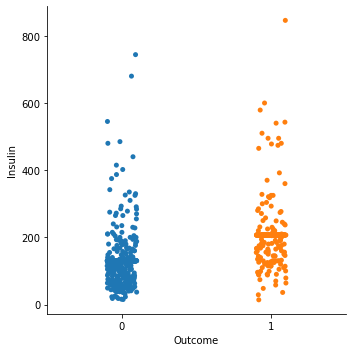

In [22]:
sns.catplot(x = "Outcome", y = "Insulin", data = df);

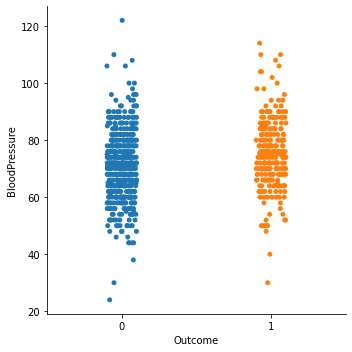

In [23]:
sns.catplot(x = "Outcome", y = "BloodPressure", data = df);

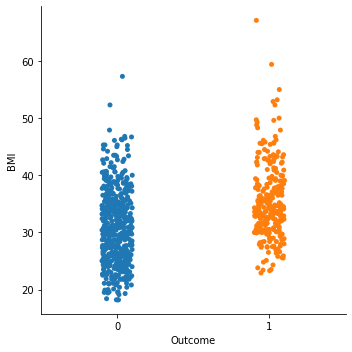

In [24]:
sns.catplot(x = "Outcome", y = "BMI", data = df);#the 0 value for outcome feature is more dense around 20 BMI. Healthy people are more generally 0.

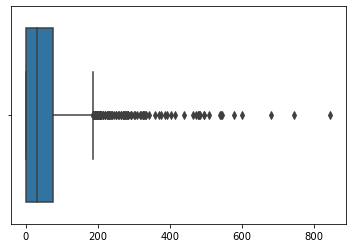

In [25]:
sns.boxplot(df)

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
SkinThickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
BMI,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


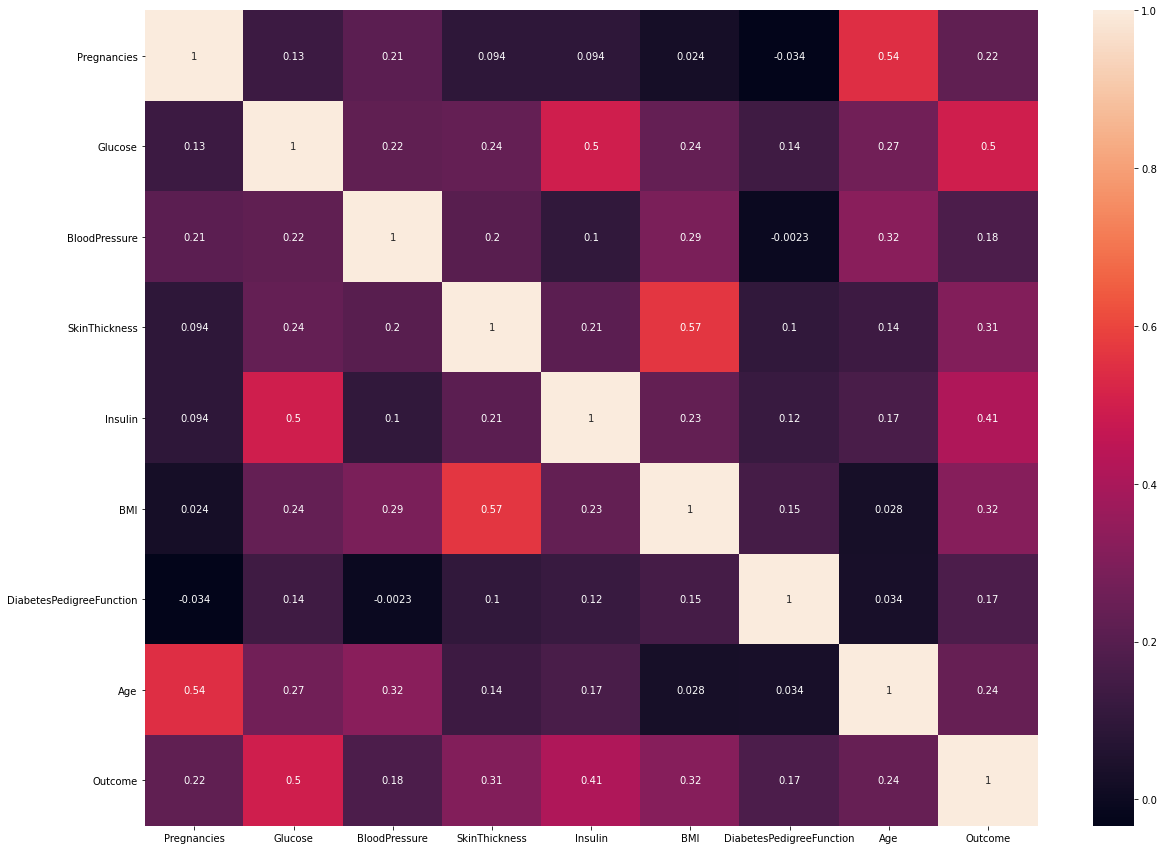

In [27]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(),annot=True,ax=ax)

# ALGORITHMS

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.000000,199.00
BloodPressure,768.0,72.428141,12.106044,24.000,64.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.247042,8.923908,7.000,25.00000,28.000000,33.000000,99.00
Insulin,768.0,157.003527,88.860914,14.000,121.50000,130.287879,206.846154,846.00
BMI,768.0,32.446420,6.878970,18.200,27.50000,32.050000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [29]:
for feature in df:

    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
        print("lower",lower,"\nupper",upper)
        df.loc[df[feature] > upper,feature] = upper
    else:
        print(feature, "no")
        

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
1
lower -30.124999999999993 
upper 88.475
Insulin yes
3
lower -314.5 
upper 657.5
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.000
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.000000,199.000
BloodPressure,768.0,72.428141,12.106044,24.000,64.00000,72.000000,80.000000,122.000
SkinThickness,768.0,29.233338,8.824174,7.000,25.00000,28.000000,33.000000,88.475
Insulin,768.0,156.616157,86.319814,14.000,121.50000,130.287879,206.846154,657.500
BMI,768.0,32.446420,6.878970,18.200,27.50000,32.050000,36.600000,67.100
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.420
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.000


In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


# Feature Engineering

In [32]:
df['BMIRanges'] = pd.cut(x=df['BMI'], bins=[0,18.5,25,30,100],labels = ["Underweight","Healthy","Overweight","Obese"])

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese


In [34]:
df.groupby(["Outcome","BMIRanges"]).describe()

Pregnancies                                           \
                          count      mean       std  min   25%  50%  75%   
Outcome BMIRanges                                                          
0       Underweight         4.0  0.750000  0.500000  0.0  0.75  1.0  1.0   
        Healthy           101.0  3.138614  2.959830  0.0  1.00  2.0  5.0   
        Overweight        136.0  3.279412  2.769386  0.0  1.00  2.0  5.0   
        Obese             259.0  3.409266  3.173667  0.0  1.00  2.0  5.0   
1       Healthy             7.0  5.285714  2.811541  1.0  3.50  6.0  7.0   
        Overweight         44.0  5.818182  3.315031  0.0  3.00  6.0  8.0   
        Obese             217.0  4.658986  3.828962  0.0  1.00  4.0  7.0   

                          Glucose              ... DiabetesPedigreeFunction  \
                      max   count        mean  ...                      75%   
Outcome BMIRanges                              ...                            
0       Underweight   1.0     4.0   95.250000  ...                  0.59250   
        Healthy      13.0   101.0  104.689543  ...                  0.49100   
        Overweight   12.0   136.0  113.482675  ...                  0.56800   
        Obese        13.0   259.0  111.712911  ...                  0.56500   
1       Healthy       9.0     7.0  157.571429  ...                  0.55950   
        Overweight   13.0    44.0  131.840909  ...                  0.72425   
        Obese        17.0   217.0  143.952254  ...                  0.74200   

                              Age                                           \
                       max  count       mean        std   min    25%   50%   
Outcome BMIRanges                                                            
0       Underweight  0.624    4.0  24.000000   3.464102  21.0  21.00  24.0   
        Healthy      1.698  101.0  31.099010  12.903879  21.0  22.00  26.0   
        Overweight   1.699  136.0  31.360294  12.994969  21.0  22.00  27.0   
        Obese        2.329  259.0  31.247104  10.461110  21.0  24.00  27.0   
1       Healthy      0.678    7.0  44.285714  14.738999  23.0  32.50  50.0   
        Overweight   1.318   44.0  37.931818   9.879266  22.0  29.75  36.0   
        Obese        2.420  217.0  36.658986  11.010678  21.0  27.00  36.0   

                                 
                      75%   max  
Outcome BMIRanges                
0       Underweight  27.0  27.0  
        Healthy      35.0  72.0  
        Overweight   36.0  81.0  
        Obese        38.0  69.0  
1       Healthy      56.0  60.0  
        Overweight   46.0  62.0  
        Obese        43.0  70.0  

[7 rows x 64 columns]

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese


In [36]:
df["Insulin"].describe().T

count    768.000000
mean     156.616157
std       86.319814
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      657.500000
Name: Insulin, dtype: float64

In [37]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [38]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))


In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges,INSULIN_DESC
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese,Abnormal
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese,Abnormal


In [40]:
df['NewGlucose'] = pd.cut(x=df['Glucose'], bins=[0,70,99,126,200],labels = ["Low","Normal","Secret","High"])

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges,INSULIN_DESC,NewGlucose
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Obese,Abnormal,High
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Obese,Abnormal,High


In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges_Healthy,BMIRanges_Overweight,BMIRanges_Obese,INSULIN_DESC_Normal,NewGlucose_Normal,NewGlucose_Secret,NewGlucose_High
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,0,0,1,0,0,0,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,0,1,0,1,1,0,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,1,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,0,1,0,1,1,0,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,0,0,1,0,0,0,1


In [44]:
from sklearn.preprocessing import RobustScaler


In [45]:
r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(df.drop(["Outcome","BMIRanges_Healthy","BMIRanges_Overweight","BMIRanges_Obese","INSULIN_DESC_Normal","NewGlucose_Normal","NewGlucose_Secret","NewGlucose_High"],axis=1))

df_r = pd.DataFrame(df_r, columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

In [46]:
df_r

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000,0.875,0.897033,0.170330,0.665359,1.235294
1,-0.4,-0.775758,-0.375,0.125,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.600000,-0.500,0.625,0.897033,-0.961538,0.783007,0.176471
3,-0.4,-0.678788,-0.375,-0.625,-0.425185,-0.434066,-0.537255,-0.470588
4,-0.6,0.484848,-2.000,0.875,0.441873,1.214286,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.250,2.500,0.582476,0.093407,-0.526797,2.000000
764,-0.2,0.121212,-0.125,-0.125,0.000000,0.521978,-0.084967,-0.117647
765,0.4,0.096970,0.000,-0.625,-0.214279,-0.642857,-0.333333,0.058824
766,-0.4,0.218182,-0.750,0.625,0.897033,-0.214286,-0.061438,1.058824


In [47]:
df = pd.concat([df_r,df[["Outcome","BMIRanges_Healthy","BMIRanges_Overweight","BMIRanges_Obese","INSULIN_DESC_Normal","NewGlucose_Normal","NewGlucose_Secret","NewGlucose_High"]]],axis=1)

In [48]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIRanges_Healthy,BMIRanges_Overweight,BMIRanges_Obese,INSULIN_DESC_Normal,NewGlucose_Normal,NewGlucose_Secret,NewGlucose_High
0,0.6,0.751515,0.000,0.875,0.897033,0.170330,0.665359,1.235294,1,0,0,1,0,0,0,1
1,-0.4,-0.775758,-0.375,0.125,0.000000,-0.598901,-0.056209,0.117647,0,0,1,0,1,1,0,0
2,1.0,1.600000,-0.500,0.625,0.897033,-0.961538,0.783007,0.176471,1,1,0,0,0,0,0,1
3,-0.4,-0.678788,-0.375,-0.625,-0.425185,-0.434066,-0.537255,-0.470588,0,0,1,0,1,1,0,0
4,-0.6,0.484848,-2.000,0.875,0.441873,1.214286,5.007843,0.235294,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.250,2.500,0.582476,0.093407,-0.526797,2.000000,0,0,0,1,0,0,1,0
764,-0.2,0.121212,-0.125,-0.125,0.000000,0.521978,-0.084967,-0.117647,0,0,0,1,1,0,1,0
765,0.4,0.096970,0.000,-0.625,-0.214279,-0.642857,-0.333333,0.058824,0,0,1,0,1,0,1,0
766,-0.4,0.218182,-0.750,0.625,0.897033,-0.214286,-0.061438,1.058824,1,0,0,1,0,0,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   BMIRanges_Healthy         768 non-null    uint8  
 10  BMIRanges_Overweight      768 non-null    uint8  
 11  BMIRanges_Obese           768 non-null    uint8  
 12  INSULIN_DESC_Normal       768 non-null    uint8  
 13  NewGlucose_Normal         768 non-null    uint8  
 14  NewGlucose

In [50]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=46)

for name,model in models:
    mod = model.fit(X_train,y_train) #trainleri modele fit etmek
    y_pred = mod.predict(X_test) # tahmin
    acc = accuracy_score(y_test, y_pred) #rmse hesabı
    cvscore = cross_val_score(model, X,y, cv = 10).mean()
    print("Holdout Method:",end=" ")
    print(name,acc) #yazdırılacak kısım
    print("Cross Val Score",end=" ")
    print(name,cvscore)
    print("------------------------------------")

Holdout Method: LR 0.8571428571428571
Cross Val Score LR 0.8462576896787424
------------------------------------
Holdout Method: KNN 0.7922077922077922
Cross Val Score KNN 0.8268113465481888
------------------------------------
Holdout Method: SVR 0.8506493506493507
Cross Val Score SVR 0.8436773752563227
------------------------------------
Holdout Method: CART 0.7727272727272727
Cross Val Score CART 0.8607484620642515
------------------------------------
Holdout Method: RandomForests 0.8376623376623377
Cross Val Score RandomForests 0.878879015721121
------------------------------------
Holdout Method: GradientBoosting 0.8636363636363636
Cross Val Score GradientBoosting 0.8984962406015038
------------------------------------
Holdout Method: XGBoost 0.8441558441558441
Cross Val Score XGBoost 0.8868079289131922
------------------------------------
Holdout Method: Light GBM 0.8701298701298701
Cross Val Score Light GBM 0.8920027341079972
------------------------------------


# KNN Model Tuning

In [51]:
knn_params = {"n_neighbors": np.arange(2,30,1)}

knn_model = KNeighborsClassifier()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X,y)

In [52]:
knn_cv_model.best_params_

{'n_neighbors': 27}

In [53]:
knn_tuned = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X,y)


In [54]:
cross_val_score(knn_tuned, X,y, cv = 10).mean()

0.8489747095010254

# CART Model Tuning

In [55]:
cart_model = DecisionTreeClassifier()

In [56]:
cart_params = {"max_depth": [2,3,4,5,10,20,100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [57]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose =  2).fit(X,y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    3.7s finished


In [58]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 30}

In [59]:
cart_tuned = DecisionTreeClassifier(**cart_cv_model.best_params_).fit(X,y)

In [60]:
cross_val_score(cart_tuned, X,y, cv = 10).mean()

0.876332877648667

# RF Model Tuning

In [61]:
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [100, 500, 900],
            "min_samples_split": [2,10,30]}

In [62]:
rf_model = RandomForestClassifier()

In [63]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  7.4min finished


In [64]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 900}

In [65]:
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X,y)

In [66]:
cross_val_score(rf_tuned, X,y, cv = 10).mean()

0.8893711551606287

# SVC Model Tuning

In [67]:
svc_model = SVC()

In [68]:
svc_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svc_cv_model = GridSearchCV(svc_model, svc_params, cv = 10, n_jobs = -1, verbose =  2).fit(X,y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


In [69]:
svc_cv_model.best_params_

{'C': 1}

In [70]:
svc_tuned = SVC(**svc_cv_model.best_params_).fit(X,y)

In [71]:
cross_val_score(svc_tuned, X,y, cv = 10).mean()

0.8436773752563227

# GB Model Tuning

In [72]:
gb_model = GradientBoostingClassifier()

In [73]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8,10],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.5,0.8]}

In [74]:
gbm_cv_model = GridSearchCV(gb_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 20.0min finished


In [75]:
gbm_cv_model.best_params_


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}

In [76]:
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X,y)

In [77]:
cross_val_score(gbm_tuned, X,y, cv = 10).mean()

0.903691045796309

# Light GBM Model Tuning

In [78]:
lgbm_params = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [200, 500, 1000],
              "max_depth":[5,8,10],
              "colsample_bytree": [1,0.5,0.3]}


In [79]:
lgbm_model = LGBMClassifier()

In [80]:
lgbm_cv_model = GridSearchCV(lgbm_model, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.6min finished


In [81]:
lgbm_cv_model.best_params_


{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 500}

In [82]:
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X,y)


In [83]:
cross_val_score(lgbm_tuned, X,y, cv = 10).mean()

0.8959159261790839

# XGB Model Tuning

In [84]:
xgb_model = XGBClassifier()

In [85]:
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}

In [86]:
xgb_cv_model  = GridSearchCV(xgb_model,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.5min finished


In [87]:
xgb_cv_model.best_params_


{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

In [88]:
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)


In [89]:
cross_val_score(xgb_tuned, X,y, cv = 10).mean()

0.9036568694463429